<a href="https://colab.research.google.com/github/SathvikTumoju/Exploratory-Data-Analysis/blob/master/ML_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.1 Importing Libraries and data set**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns                       
import matplotlib.pyplot as plt             # for data visualisation
%matplotlib inline

from google.colab import files           # importing file from local drive
uploaded = files.upload()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving data.csv to data.csv


Data file is uploaded successfully 🙂🙂🙂. Now it's time to load data into data frame.

In [54]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))     # df stands for data frame
df.head()                                              # .head() shows top 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


**1.2 Checking the data types**

Now let's know the information about data 

In [55]:
df.shape         # total number of rows and columns
df.info()        # gives information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Total rows are 11914 and Total columns are 16. No change in columns is required. Now lets analyse rows

**1.3 Statistical Summary**

Let's analyse the statistical summary of data using describe function

In [56]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


**1.4 Shape**

Shape gives number of rows, number of columns of data frame

In [57]:
df.shape   # ( number of rows, number of columns)

(11914, 16)

**1.5 Null Values**

Let's find which columns contain null values

In [58]:
print(df.isnull().sum())  # gives total number of null values in all columns

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


**2 Dropping less relavence columns**
****

We need to drop less relavence columns, because we don't need them and they may affect our machine learning model.

Dropping "Engine fuel type" because it will be either premium unleaked or relugar unleaked so it won't effect much ,"Number of doors" because it will be either 4 or 2 so it won't effect much ,"Market Category","Vehicle Style","Vehicle Size" it also won't effect on our analysis...



In [59]:
df = df.drop(['Engine Fuel Type', 'Number of Doors','Market Category','Vehicle Size','Vehicle Style'], axis=1)   #drop() drops the columns mentioned in it.
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


**3. Renaming Columns**

We can rename columns so that it can be easy for us in future analysis.

In [60]:
# Use rename() we can rename columns. 
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


**4. Finding Duplicates,Null values,Missing data and removing them**


We need to duplicates,null values,missing data . Because we don't need them and they may affect our machine learning model.

Checking Duplicates

In [61]:
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows are : ",duplicate_rows.shape[0] )   #.shape[0] prints number of rows, .shape[1] prints number of columns


number of duplicate rows are :  989


**4.1 Dropping duplicates**

In [62]:
df = df.drop_duplicates()                                          # dropping the duplicates
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows are : ",duplicate_rows.shape[0] )
print("number of  rows are : ",df.shape[0] )

number of duplicate rows are :  0
number of  rows are :  10925


Checking Null values


In [63]:
print(df.isnull().sum())                 #checking number of null values in each column
print("---------------------------")
df.count()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64
---------------------------


Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Popularity      10925
Price           10925
dtype: int64

As you can see above HP , Cylinders have some null attributes so we have to remove that rows

**4.2 Removing null and missing attributes**

In [64]:
df = df.dropna()       #dropna()  drops null values
print(df.isnull().sum())
print("-----------------------------")
df.count()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Popularity      0
Price           0
dtype: int64
-----------------------------


Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Popularity      10827
Price           10827
dtype: int64

All null attributes are removed

**5.Outliers**

An outlier is a point or set of points that are different from other points.There are many methods to find outliers. Some of them are using Box-plot,Scatter-plot,IQR score, Z score and manymore..

Let's analyse using box plot

**Box plot**

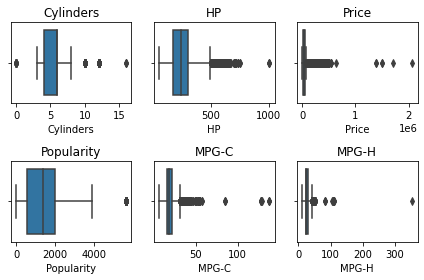

In [65]:
# lets create subplots 
plt.subplot(2,3,1)
plt.title("Cylinders")
sns.boxplot(x=df['Cylinders'])      

plt.subplot(2,3,2)
plt.title("HP")
sns.boxplot(x=df['HP'])

plt.subplot(2,3,3)
plt.title("Price")
sns.boxplot(x=df['Price'])

plt.subplot(2,3,4)
plt.title("Popularity")
sns.boxplot(x=df['Popularity'])

plt.subplot(2,3,5)
plt.title("MPG-C")
sns.boxplot(x=df['MPG-C'])

plt.subplot(2,3,6)
plt.title("MPG-H")
sns.boxplot(x=df['MPG-H'])

plt.tight_layout()

**IQR**

IQR stands for inter quartile range.We can remove outliers using IQR.

In [66]:
Q1 = df.quantile(0.25)        #quantile of first quarter
Q3 = df.quantile(0.75)        # quantile of second quarter
IQR = Q3 - Q1                 # differnce
print(IQR)

Year              9.0
HP              130.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21327.5
dtype: float64


In [67]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]   #removing rows before Q1 and after Q3.
df.shape

(8438, 11)

In [68]:
Q1 = df.quantile(0.25)        #quantile of first quarter
Q3 = df.quantile(0.75)        # quantile of second quarter
IQR = Q3 - Q1                 # differnce
print(IQR)

Year              8.0
HP              117.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1302.0
Price         18032.5
dtype: float64


You can notice the decrease in IQR values. So,we have successfully removed most of the outliers using IQR. Now you can also run the above boxplot and you will find no outliners. **Now you can also run the above boxplots and you will see decrease outliners**

**6.1 Most represented car brands**

In [69]:
counts = df['Make'].value_counts()
topCars= counts.keys().to_list()[:10]       #to_list()  converts to list. and now topCars contain top 10 cars 
for i in range(10):
  print(topCars[i])                         # printing the cars using for loop 

Chevrolet
Toyota
Volkswagen
Nissan
GMC
Dodge
Mazda
Honda
Suzuki
Infiniti


**6.2 Finding average prices of top car brands**

In [70]:
 df1 = df[['Make','Price']]                                        # contains columns make , price 
 print("Make/Model           AveragePrice \n")

 for x in topCars:                                                 # topCars is list from the above code
   df2=df1[df1['Make']== x ].mean().to_list()                      # prints average price of input cars and add it to a list df2
   print(x+ "       " , end="")
   print(df2[0])

Make/Model           AveragePrice 

Chevrolet       28630.917082917083
Toyota       27860.31922398589
Volkswagen       29032.817475728156
Nissan       28404.013671875
GMC       33462.65450643777
Dodge       26190.560283687944
Mazda       20495.820105820105
Honda       27400.45552560647
Suzuki       18361.29552238806
Infiniti       43127.82298136646


We successfully printed average price of top ten cars list.

**7. Correalation Matrix**

Correlation matrix is a matrix which gives correlation value between all numerical variables in matrix form.So we use correlation matrix to find correlation between matrix and drop irrelavent columns

In [71]:
df.corr()        #corr() gives correlation matrix of the data form

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.314687,-0.114560,0.379871,0.339894,0.194792,0.577544
HP,0.314687,1.000000,0.736268,-0.454730,-0.557035,0.092237,0.744946
Cylinders,-0.114560,0.736268,1.000000,-0.692258,-0.747238,0.012965,0.390584
MPG-H,0.379871,-0.454730,-0.692258,1.000000,0.937019,0.092447,-0.123900
MPG-C,0.339894,-0.557035,-0.747238,0.937019,1.000000,0.079140,-0.201820
Popularity,0.194792,0.092237,0.012965,0.092447,0.079140,1.000000,0.108194
Price,0.577544,0.744946,0.390584,-0.123900,-0.201820,0.108194,1.000000




*   Year has a negative correlation with cylinders and have a reasonably good corelation with price (inflation is one of the factor)
*   HP has a reasonably good correlation with Cylinders ( for more power more volume is needed)
*Cylinders have slightly same negative corelation with MPG-C,MPG-H(some high cc cars may have less mpg)
*Price and Popularity have positive but less correlation( we all think high popularity implies high price , but it is not the case everytime) 



We can also build heatmap of correlation matrix using seaborn.Now let's make it.

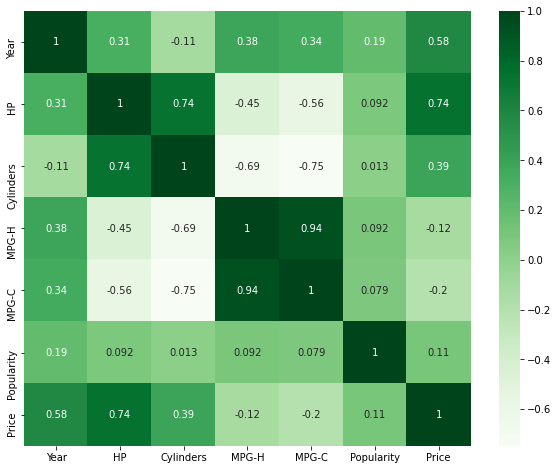

In [72]:
 plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

**8. EDA Analysis**

Exploratory data analysis is very important and crucial step.In this step we shall summarize the main characteristics of data using visual methods. We shall analyse the data using different plots and note our readings later. 

**Histogram**

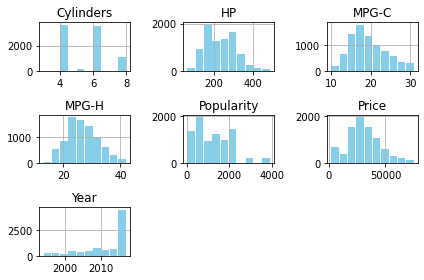

In [73]:
df.hist( rwidth=0.9 ,color='skyblue')        # plotting histogram with skyblue colour
plt.tight_layout()                           # tight_layout controls the  padding in the layout and makes it clear

**Scatter Plot**

scatter plot is to visualize price vs other continuous variables

Let's plot subplots using different colours for better visualization.

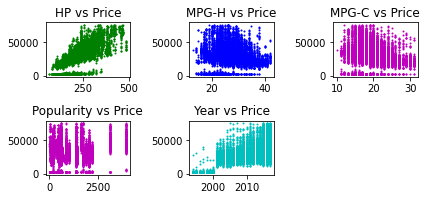

In [74]:
plt.subplot(3,3,1)
plt.title("HP vs Price")
plt.scatter(df["HP"],df["Price"],s=1, c='g')

plt.subplot(3,3,2)
plt.title("MPG-H vs Price")
plt.scatter(df["MPG-H"],df["Price"],s=1,c='b')

plt.subplot(3,3,3)
plt.title("MPG-C vs Price")
plt.scatter(df["MPG-C"],df["Price"],s=1,c='m')

plt.subplot(3,3,4)
plt.title("Popularity vs Price")
plt.scatter(df["Popularity"],df["Price"],s=1,c='m')

plt.subplot(3,3,5)
plt.title("Year vs Price")
plt.scatter(df["Year"],df["Price"],s=1,c='c')

plt.tight_layout()


**Bar Graph**

Bar graph is for visualization of price vs categorical variables

Let's plot subplots using different colours for better visualization.

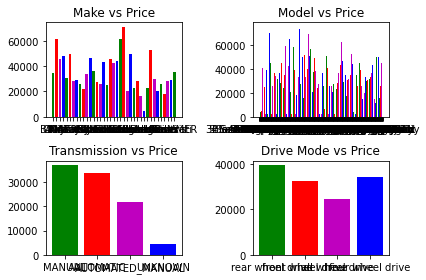

In [75]:
colours=['g','r','m','b']               #list of colours to be used
plt.subplot(2,2,1)
plt.title("Make vs Price")             # For titling graphs
Unique_models= df['Make'].unique()
Price_avg = df.groupby('Make').mean()['Price']
plt.bar(Unique_models,Price_avg, color=colours )

plt.subplot(2,2,2)
plt.title("Model vs Price")
Unique_models= df['Model'].unique()
Price_avg = df.groupby('Model').mean()['Price']
plt.bar(Unique_models,Price_avg ,color=colours)

plt.subplot(2,2,3)
plt.title("Transmission vs Price")
Unique_models= df['Transmission'].unique()
Price_avg = df.groupby('Transmission').mean()['Price']
plt.bar(Unique_models,Price_avg,color=colours )


plt.subplot(2,2,4)
plt.title("Drive Mode vs Price")
Unique_models= df['Drive Mode'].unique()
Price_avg = df.groupby('Drive Mode').mean()['Price']
plt.bar(Unique_models,Price_avg,color=colours )

plt.tight_layout()

x-axis variables in each graph are not clearly visible because of more number of variables😃.

SUMMARY


*   There is a significant change in transmission,drive mode with change in price
*   Price varies with make,model.
*  Price increases almost lineraly with year.
* Price increases almost lineraly with horse power(HP) also. 
* Relation between MPG(H,C) and Price is not linear. Initially price is constant with increase in MPG and started decreasing later on.
* It seems there is no relation between popularity and price.
* Most cars in data are from latest year.
*Most cars in the data contain 4,6 cylinders.  







**9,10. Building Machine Learning Models**

Now it's time to build machine learning model and check which model is suits better for our data.

First step in building the model is to split the data into train,test. It is because to train our model with train data and test it using test data.We shall split data into 80 and 20 ratio.

In [76]:
from sklearn.model_selection import train_test_split                   #used to split data
from sklearn.metrics import mean_squared_error,mean_absolute_error     #used for calculating errors
from sklearn.preprocessing import StandardScaler                       # imports standardScaler for scaling 
import math                                                            #imports math for calculations
                          
Y = df['Price'].values
X = df[['Year','HP','Cylinders','MPG-H','MPG-C','Popularity']].values
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y.reshape(-1,1))
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=1234)         #splits data into 80 and 20 ratio

We successfully split the data.Now let's try to build our first model i.e, linear regression model.



*   R2 = R square
*   RMSE = Root Mean Square Error
* MAE = Mean Absolute Error



**Multilinear Regression**

In [77]:
#multilinear regression
from sklearn.linear_model import LinearRegression            #imports LinearRegresion

std_reg = LinearRegression()
std_reg.fit(X_train,Y_train)
Y_predict = std_reg.predict(X_test)
r2_test = std_reg.score(X_test,Y_test)
r2_train = std_reg.score(X_train,Y_train)
rmse = math.sqrt(mean_squared_error(Y_test,Y_predict))
mae   = mean_absolute_error(Y_test, Y_predict )
print('r2_test  : '+ str(r2_test)  )
print('r2_train : '+str(r2_train) )
print('rmse     : ' + str(rmse) )
print('mae      : '+ str(mae) )


r2_test  : 0.7014474912337116
r2_train : 0.6850114568263814
rmse     : 0.5446073994259039
mae      : 0.42201573550860627


**Logistic Regression**

In [78]:
#logistic regression
from sklearn.linear_model import LogisticRegression                         #imports logistic regression
from sklearn import preprocessing                                           #imports preprocessing

lab_enc = preprocessing.LabelEncoder()
Y_train_encoded = lab_enc.fit_transform(Y_train)
Y_test_encoded = lab_enc.fit_transform(Y_test)
lr = LogisticRegression()
lr.fit(X_train,Y_train_encoded)
Y_predict1 = lr.predict(X_test)
r2_test1 = lr.score(X_test,Y_test_encoded)
r2_train1 = lr.score(X_train,Y_train_encoded)
rmse1 = math.sqrt(mean_squared_error(Y_test_encoded,Y_predict1))
mae1   = mean_absolute_error(Y_test_encoded, Y_predict1 )

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [79]:
print('r2_test  : '+ str(r2_test1)  )
print('r2_train : '+str(r2_train1) )
print('rmse     : ' + str(rmse1) )
print('mae      : '+ str(mae1) )

r2_test  : 0.03376777251184834
r2_train : 0.04651851851851852
rmse     : 1455.5803674689823
mae      : 1223.9277251184835


**Support Vector Regression (SVR)**

In [80]:
#SVR
from sklearn.svm import SVR                                            #imports svr    
svr = SVR(kernel='rbf',gamma=1.0)                                      # we can use other kernel also and you may get different result
svr.fit(X_train,Y_train)
Y_predict2=svr.predict(X_test)
r2_test2 = svr.score(X_test,Y_test)
r2_train2 = svr.score(X_train,Y_train)
rmse2 = math.sqrt(mean_squared_error(Y_test,Y_predict2))
mae2 = mean_absolute_error(Y_test, Y_predict2 )
print('r2_test  : '+ str(r2_test2)  )
print('r2_train : '+str(r2_train2) )
print('rmse     : ' + str(rmse2) )
print('mae      : '+ str(mae2) )


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2_test  : 0.8849877659074431
r2_train : 0.889155015569553
rmse     : 0.3380221774348955
mae      : 0.23917733601002766


**Decission Tree**

In [81]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor                                #imports decisionTreeRegressor
dtc= DecisionTreeRegressor()
dtc.fit(X_train,Y_train)
Y_predict3 = dtc.predict(X_test)
r2_test3 = dtc.score(X_test,Y_test)
r2_train3 = dtc.score(X_train,Y_train)
rmse3 = math.sqrt(mean_squared_error(Y_test,Y_predict3))
mae3  = mean_absolute_error(Y_test, Y_predict3)

print('r2_test  : '+ str(r2_test3)  )
print('r2_train : '+str(r2_train3) )
print('rmse     : ' + str(rmse3) )
print('mae      : '+ str(mae3) )



r2_test  : 0.9146656749654666
r2_train : 0.9710733344453619
rmse     : 0.29116224146170716
mae      : 0.20049736794598974


**Random Tree**

In [82]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor                    #imports randomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(X_train,Y_train)
Y_predict4 = rfc.predict(X_test)
r2_test4 = rfc.score(X_test,Y_test)
r2_train4 = rfc.score(X_train,Y_train)
rmse4 = math.sqrt(mean_squared_error(Y_test,Y_predict4))
mae4  = mean_absolute_error(Y_test, Y_predict4)

print('r2_test  : '+ str(r2_test4)  )
print('r2_train : '+str(r2_train4) )
print('rmse     : ' + str(rmse4) )
print('mae      : '+ str(mae4) )



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


r2_test  : 0.9310807571004782
r2_train : 0.9685088446240483
rmse     : 0.2616636674777433
mae      : 0.18697582138424906


We made 5 machine learning models and calculated their metrics.Now let's make a table for better comparision.

**Tabluating all metrics**

In [86]:
print("               "+" R2_test     "+"  R2_train     "+"  RMSE       "+"  MAE         ")
print(" Multilinear    "+ str(round(r2_test,3)) +"          "+ str(round(r2_train,3))+"         "+ str(round(rmse,3))+"       "+ str(round(mae,3)))
print(" Logistic       "+str(round(r2_test1,3)) +"          "+ str(round(r2_train1,3))+"         "+ str(round(rmse1,3))+"     "+ str(round(mae1,3)))
print(" SVR            "+str(round(r2_test2,3)) +"          "+ str(round(r2_train2,3))+"         "+ str(round(rmse2,3))+"       "+ str(round(mae2,3)))
print(" DecissionTree  "+str(round(r2_test3,3)) +"          "+ str(round(r2_train3,3))+"         "+ str(round(rmse3,3))+"       "+ str(round(mae3,3)))
print(" RandomForest   "+str(round(r2_test4,3)) +"          "+ str(round(r2_train4,3))+"         "+ str(round(rmse4,3))+"       "+ str(round(mae4,3)))

                R2_test       R2_train       RMSE         MAE         
 Multilinear    0.701          0.685         0.545       0.422
 Logistic       0.034          0.047         1455.58     1223.928
 SVR            0.885          0.889         0.338       0.239
 DecissionTree  0.915          0.971         0.291       0.2
 RandomForest   0.931          0.969         0.262       0.187



SUMMARY

*   Random forest shows more accuracy.
*   Model failed when we used logistic regression.
*  All other algorithms are good at accuray other except logistic.
* Decission tree and Random forest are almost same at accuray
* SVR stands next after random forest and decission tree at accuracy, followed by linear regression.


**THANK YOU😊😊😉**